<a href="https://colab.research.google.com/github/fbghkh1999/Multi_predict_model_base-on-different-datasets/blob/main/tensorflow_model/KerasMinstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! unzip /content/MNIST.zip

Archive:  /content/MNIST.zip
   creating: MNIST/
   creating: MNIST/test/
  inflating: MNIST/test/t10k-images.idx3-ubyte  
  inflating: MNIST/test/t10k-labels.idx1-ubyte  
   creating: MNIST/train/
  inflating: MNIST/train/train-images.idx3-ubyte  
  inflating: MNIST/train/train-labels.idx1-ubyte  


In [2]:
pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7920 sha256=a789fa59a2a0c75741ddc81320aa06e3b95a813764a3ba7c888e483b0af4b2dd
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


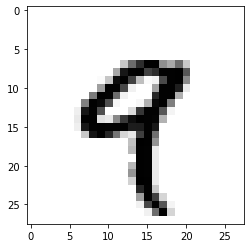

In [32]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
    
imagefile = '/content/MNIST/train/train-images.idx3-ubyte'
imagefileLable='/content/MNIST/train/train-labels.idx1-ubyte'
X_train = idx2numpy.convert_from_file(imagefile)
Y_train=idx2numpy.convert_from_file(imagefileLable)
plt.imshow(X_train[4], cmap=plt.cm.binary)

In [27]:
from sklearn.cluster import KMeans
kmn=KMeans(n_clusters=10,n_init=12,max_iter=400,random_state=42,algorithm='full')
nsamples,x,y=X_train.shape
X_train=X_train.reshape(nsamples,784)
# kmn.fit(X_train)

In [3]:
kmn.predict(X_train)

NotFittedError: ignored

In [5]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
testimagefile='/content/MNIST/test/t10k-images.idx3-ubyte'
X_test = idx2numpy.convert_from_file(testimagefile)
testlabel='/content/MNIST/test/t10k-labels.idx1-ubyte'
Y_test=idx2numpy.convert_from_file(testlabel)
testsample,testm,testn=X_test.shape
X_test=X_test.reshape(testsample,784)

In [7]:
tstlabel=kmn.predict(X_test)
Y_test.shape

(10000,)

In [17]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(Y_test,tstlabel)

NameError: ignored

In [18]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
 purity_score(Y_test, tstlabel)


0.5951

In [4]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
input_shape=(x*y,)
# Create the model
model = Sequential()
model.add(Dense(350,input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
from tensorflow.keras.utils import to_categorical
np.random.shuffle(Y_train)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [6]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# imagearray=imagearray.reshape(imagearray.shape[0],784).shape



In [29]:
# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
model.fit(np.array(X_train), np.array(Y_train), epochs=10, batch_size=250, verbose=1)

Epoch 1/10
240/240 [==============================] - 3s 10ms/step - loss: 0.3409 - accuracy: 0.9031
Epoch 2/10
240/240 [==============================] - 2s 10ms/step - loss: 0.1280 - accuracy: 0.9628
Epoch 3/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0858 - accuracy: 0.9751
Epoch 4/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0623 - accuracy: 0.9814
Epoch 5/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0462 - accuracy: 0.9865
Epoch 6/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0370 - accuracy: 0.9893
Epoch 7/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0281 - accuracy: 0.9919
Epoch 8/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0213 - accuracy: 0.9940
Epoch 9/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0160 - accuracy: 0.9958
Epoch 10/10
240/240 [==============================] - 2s 10ms/step - loss: 0.0131 - accura

In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9795
Test results - Loss: 0.07049855589866638 - Accuracy: 0.9794999957084656%


In [ ]:
# Y_train=model.predict(np.array(X_train))

In [21]:
y_train=np.random.randint(0,9,60000)
y_train
y_train=to_categorical(y_train,10)


In [12]:
y=Y_train
np.random.shuffle(y)

array([1, 4, 1, ..., 2, 6, 2], dtype=uint8)

In [8]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
# kmeans with  mlp

# np.random.shuffle(np.array(Y_train))
s=True
count=1
while s==True:
        # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=250, verbose=1)
        predict_new=model.predict(np.array(X_train))
        count=count+1
        if predict_new.all()==y_train.all():
          s=False
        else:
          y_train=predict_new
        


Epoch 1/10
240/240 [==============================] - 2s 10ms/step - loss: 2.2106 - accuracy: 0.1116
Epoch 2/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1984 - accuracy: 0.1109
Epoch 3/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1979 - accuracy: 0.1111
Epoch 4/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1975 - accuracy: 0.1128
Epoch 5/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1972 - accuracy: 0.1137
Epoch 6/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1970 - accuracy: 0.1141
Epoch 7/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1961 - accuracy: 0.1167
Epoch 8/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1955 - accuracy: 0.1160
Epoch 9/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1945 - accuracy: 0.1207
Epoch 10/10
240/240 [==============================] - 2s 10ms/step - loss: 2.1930 - accura

In [ ]:
test_results = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 3.0245 - accuracy: 0.1171


In [ ]:
count

3

In [31]:
predict_new
y_p=np.argmax(predict_new, axis=1, out=None)

In [33]:
purity_score(Y_train,y_p)

0.1625